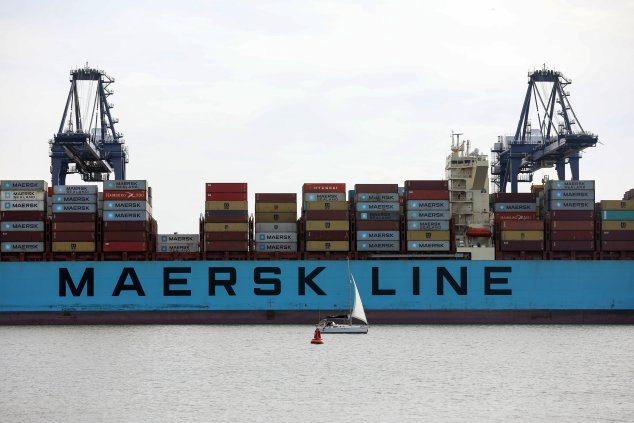

# **Importing all required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


# **Loading the training and testing dataset**

In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/dataset/DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv")

In [3]:
df_test = pd.read_csv("/content/drive/MyDrive/dataset/DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv")

In [4]:
df_train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [5]:
df_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


# **Data Preprocessing**
Handling missing values and converting "Month of Sourcing" to datetime, followed by statistical summary printing. Then, perform Label Encoding on categorical data, combine training and testing sets, and extract month information. Lastly, handle outliers in the dataset.




In [7]:
df_train.dtypes

ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object

This dataset contains information about products, including their type, manufacturer, area code, sourcing channel, size, sourcing month, and associated sourcing cost. It appears to represent a dataset related to procurement or inventory management, with categorical variables describing various aspects of sourced products and their associated costs.

**1) Null Values**



In [8]:
df_train.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

This output indicates that there are no missing values in any of the columns of the dataset. Each column appears to have complete data, making it ready for analysis without the need for imputation or handling missing values.

**2) Converting "Month of Sourcing" column from string to datetime**

In [9]:
df_train['Month of Sourcing'] = pd.to_datetime(df_train['Month of Sourcing'], format='%b-%y')

df_test['Month of Sourcing'] = pd.to_datetime(df_test['Month of Sourcing'], format='%b-%y')

These lines of code convert the 'Month of Sourcing' column in both the training (df_train) and testing (df_test) datasets from strings to datetime objects using the specified format '%b-%y', which indicates the abbreviated month name followed by a two-digit year. This conversion allows for easier manipulation and analysis of dates in the datasets, enabling tasks such as time series analysis or grouping by months.

In [10]:
df_train.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76


In [11]:
df_test.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-01,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-01,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-01,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-01,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-01,169.42


**3) Stastical Summary**

In [12]:
summary_stats = df_train.describe()
print(summary_stats)

                   Month of Sourcing  Sourcing Cost
count                         550176  550176.000000
mean   2020-12-08 10:27:28.769848576     108.817286
min              2020-07-01 00:00:00    -196.070000
25%              2020-10-01 00:00:00      57.000000
50%              2020-12-01 00:00:00     132.000000
75%              2021-03-01 00:00:00     146.150000
max              2021-05-01 00:00:00   32632.500000
std                              NaN     104.390093


The summary displays the statistics for 'Month of Sourcing' and 'Sourcing Cost'. It reveals data distribution and central tendencies, including potential outliers and variability in sourcing costs.

In [13]:
num_unique_entries = df_train.nunique()
print(num_unique_entries)

ProductType             3
Manufacturer            3
Area Code              45
Sourcing Channel        4
Product Size            3
Product Type            2
Month of Sourcing      11
Sourcing Cost        4529
dtype: int64


The output shows the count of unique entries for each column, highlighting the diversity and variability in the dataset's categorical and numerical values.

**4) Label Encoding**

In [14]:
df_train_encoded = df_train.copy()

label_encoder = LabelEncoder()

for column in ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']:
    df_train_encoded[column] = label_encoder.fit_transform(df_train[column])

In [15]:
df_test_encoded = df_test.copy()

label_encoder = LabelEncoder()

for column in ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']:
    df_test_encoded[column] = label_encoder.fit_transform(df_test[column])

These lines create copies of the training and testing datasets (df_train and df_test) and encode categorical columns using LabelEncoder. The categorical columns 'ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', and 'Product Type' are iterated through, and their values are replaced with encoded integer labels. This preprocessing step prepares the data for machine learning models that require numerical inputs instead of categorical ones.

In [16]:
df_train_encoded.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,1,1,2021-05-01,10.16
1,1,0,44,0,1,1,2020-10-01,134.28
2,2,1,12,0,1,1,2020-12-01,12.46
3,2,0,9,3,2,1,2021-02-01,107.22
4,1,0,19,0,1,0,2020-11-01,197.76


In [17]:
df_test_encoded.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,0,0,0,0,2,1,2021-06-01,103.68
1,0,0,1,0,1,1,2021-06-01,155.75
2,0,0,1,1,1,1,2021-06-01,143.02
3,0,0,2,0,1,1,2021-06-01,139.39
4,0,0,11,0,1,1,2021-06-01,169.42


In [18]:
df_train_encoded.dtypes

ProductType                   int64
Manufacturer                  int64
Area Code                     int64
Sourcing Channel              int64
Product Size                  int64
Product Type                  int64
Month of Sourcing    datetime64[ns]
Sourcing Cost               float64
dtype: object

The data types (dtypes) of the encoded columns are all int64, except for the 'Month of Sourcing' column, which is datetime64[ns]. This indicates that the categorical columns have been successfully encoded into numerical values using LabelEncoder, while the 'Month of Sourcing' column remains as datetime objects after conversion. Additionally, the 'Sourcing Cost' column retains its original float64 data type.

**5) Combining training and testing data**

In [20]:
df_combined = pd.concat([df_train_encoded, df_test_encoded], ignore_index=True)

print(df_combined)

        ProductType  Manufacturer  Area Code  Sourcing Channel  Product Size  \
0                 2             0         19                 3             1   
1                 1             0         44                 0             1   
2                 2             1         12                 0             1   
3                 2             0          9                 3             2   
4                 1             0         19                 0             1   
...             ...           ...        ...               ...           ...   
550267            2             0         37                 0             2   
550268            2             0         43                 0             1   
550269            2             0         43                 0             2   
550270            2             1         12                 0             1   
550271            2             2         14                 2             1   

        Product Type Month of Sourcing 

The pd.concat() function is used to combine the encoded training and testing datasets (df_train_encoded and df_test_encoded) along rows (axis=0) with ignore_index=True, ensuring a continuous index in the combined dataframe. Finally, print(df_combined) outputs the resulting combined dataframe containing both training and testing data.

In [21]:
df_combined

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,1,1,2021-05-01,10.16
1,1,0,44,0,1,1,2020-10-01,134.28
2,2,1,12,0,1,1,2020-12-01,12.46
3,2,0,9,3,2,1,2021-02-01,107.22
4,1,0,19,0,1,0,2020-11-01,197.76
...,...,...,...,...,...,...,...,...
550267,2,0,37,0,2,0,2021-06-01,89.57
550268,2,0,43,0,1,1,2021-06-01,114.57
550269,2,0,43,0,2,1,2021-06-01,111.26
550270,2,1,12,0,1,1,2021-06-01,32.32


In [23]:
num_unique_entries = df_combined.nunique()

print(num_unique_entries)

ProductType             3
Manufacturer            3
Area Code              45
Sourcing Channel        4
Product Size            3
Product Type            2
Month of Sourcing      12
Sourcing Cost        4596
dtype: int64


**6) Extracting the month from 'Month of Sourcing'**

In [24]:
df_combined['Month'] = df_combined['Month of Sourcing'].dt.month

df_combined.drop(columns=['Month of Sourcing'], inplace=True)

These lines of code extract the month component from the 'Month of Sourcing' column of the combined dataframe (df_combined) using the dt.month accessor, and assign it to a new column named 'Month'. Then, the 'Month of Sourcing' column is dropped from the dataframe using the drop() method with columns=['Month of Sourcing'] argument, and inplace=True to modify the dataframe in place.

In [25]:
df_combined

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Month
0,2,0,19,3,1,1,10.16,5
1,1,0,44,0,1,1,134.28,10
2,2,1,12,0,1,1,12.46,12
3,2,0,9,3,2,1,107.22,2
4,1,0,19,0,1,0,197.76,11
...,...,...,...,...,...,...,...,...
550267,2,0,37,0,2,0,89.57,6
550268,2,0,43,0,1,1,114.57,6
550269,2,0,43,0,2,1,111.26,6
550270,2,1,12,0,1,1,32.32,6


**7) Handle Outliers**

In [26]:
Q1 = df_combined['Sourcing Cost'].quantile(0.25)
Q3 = df_combined['Sourcing Cost'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outliers = (df_combined['Sourcing Cost'] < (Q1 - threshold * IQR)) | (df_combined['Sourcing Cost'] > (Q3 + threshold * IQR))

df_combined_no_outliers = df_combined[~outliers]


These lines of code calculate the interquartile range (IQR) of the 'Sourcing Cost' column in the combined dataframe (df_combined). Then, using a specified threshold value (typically 1.5), they identify outliers that fall below Q1 - threshold * IQR or above Q3 + threshold * IQR. Finally, a new dataframe (df_combined_no_outliers) is created by selecting rows from df_combined where the 'Sourcing Cost' column does not meet the outlier criteria.

In [27]:
df_combined_no_outliers

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Month
0,2,0,19,3,1,1,10.16,5
1,1,0,44,0,1,1,134.28,10
2,2,1,12,0,1,1,12.46,12
3,2,0,9,3,2,1,107.22,2
4,1,0,19,0,1,0,197.76,11
...,...,...,...,...,...,...,...,...
550267,2,0,37,0,2,0,89.57,6
550268,2,0,43,0,1,1,114.57,6
550269,2,0,43,0,2,1,111.26,6
550270,2,1,12,0,1,1,32.32,6


# **Exploratory Data Analysis**


Ploting bar charts for Sourcing Cost against Product Size and Product Type. Additionally, create a bar chart for Sourcing Cost versus Month of Sourcing. Then, analyzing top 10 Area Codes by Sourcing Cost and Maximum Product Size by Area Code.


In [28]:
df_train.columns = df_train.columns.str.replace(' ', '_')


**1) Sourcing Cost vs. Product Size Bar Chart**

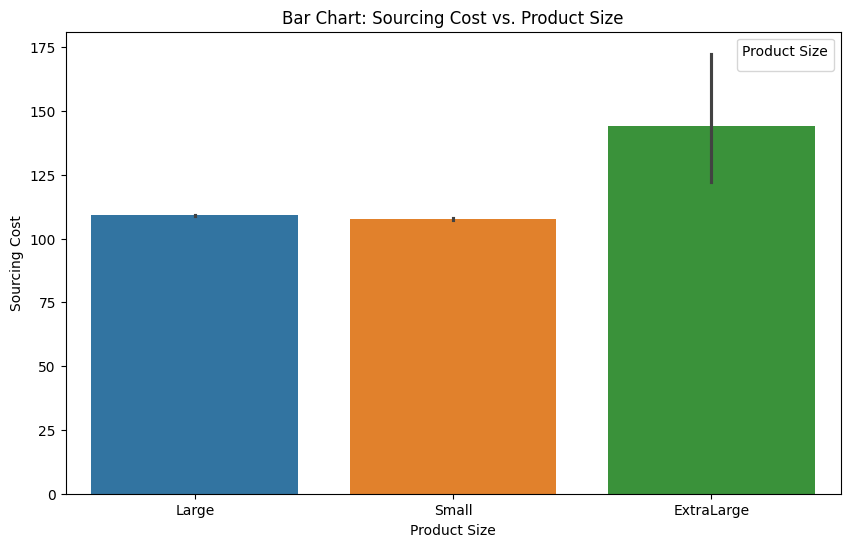

Insights:
               count        mean     min       max
Product_Size                                      
ExtraLarge      4148  144.272777    0.00  32632.50
Large         325566  109.114511  -57.60  14110.72
Small         220462  107.711266 -196.07  12630.47


In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train, x='Product_Size', y='Sourcing_Cost', hue='Product_Size', dodge=False)
plt.title('Bar Chart: Sourcing Cost vs. Product Size')
plt.xlabel('Product Size')
plt.ylabel('Sourcing Cost')
plt.legend(title='Product Size', loc='upper right')
plt.show()

insights = df_train.groupby('Product_Size')['Sourcing_Cost'].agg(['count', 'mean', 'min', 'max'])
print("Insights:")
print(insights)

1. 'Large' products dominate in terms of count, while 'ExtraLarge' products have the highest mean sourcing cost.
2. 'ExtraLarge' products exhibit significant variability, with a maximum sourcing cost as high as 32632.50 Rupees.
3. 'Small' products show the lowest variability in sourcing costs, with both the lowest minimum and maximum costs among the size categories.
4. 'Large' products, despite being the most frequently sourced, have a relatively moderate mean sourcing cost compared to other sizes.

**2) Sourcing Cost vs. Product Type Bar Chart**

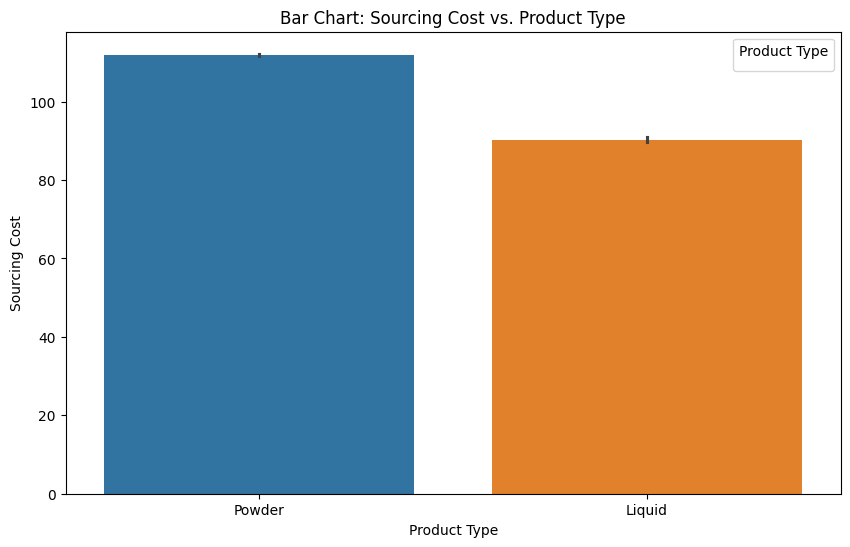

Insights:
               count        mean     min       max
Product_Type                                      
Liquid         78583   90.330443 -196.07   4167.91
Powder        471593  111.897806  -57.60  32632.50


In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train, x='Product_Type', y='Sourcing_Cost', hue='Product_Type', dodge=False)
plt.title('Bar Chart: Sourcing Cost vs. Product Type')
plt.xlabel('Product Type')
plt.ylabel('Sourcing Cost')
plt.legend(title='Product Type', loc='upper right')
plt.show()

insights_product_type = df_train.groupby('Product_Type')['Sourcing_Cost'].agg(['count', 'mean', 'min', 'max'])
print("Insights:")
print(insights_product_type)

1. 'Powder' products exhibit a notably higher count and mean sourcing cost compared to 'Liquid' products.
2. Sourcing costs for 'Powder' products display greater variability, with a maximum cost reaching 32632.50 Rupees.
3. Despite having a lower mean sourcing cost, 'Liquid' products show a wider range of minimum and maximum sourcing costs.
4. 'Powder' products appear to be the predominant choice in sourcing, with a significantly higher count compared to 'Liquid' products.

**3) Sourcing Cost vs. Month of Sourcing Bar Chart**

<ipython-input-35-1cab5a637645>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_datetime, x='Month', y='Sourcing_Cost', ci=None)


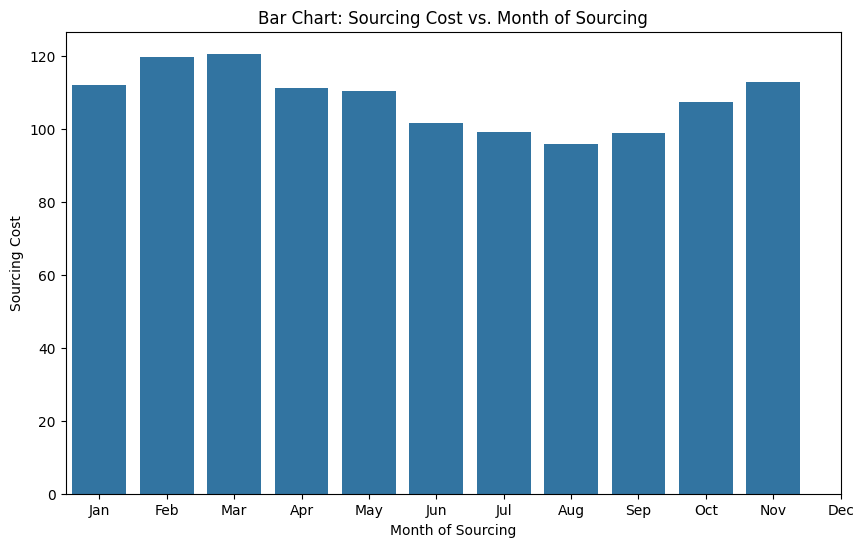

Insights:
       count        mean     min       max
Month                                     
1      50844  112.106085    0.00   5700.00
2      50562  119.825242    0.00  11970.00
3      56643  120.651969 -121.16   8379.00
4      52438  111.223734 -147.03   2280.00
5      53172  110.500465 -196.07  12630.47
7      42469  101.532779    0.00   3125.79
8      40640   99.213042    0.00   2574.23
9      43995   95.889838    0.00  14110.72
10     46215   98.776522    0.00  32632.50
11     60446  107.299802    0.00   9867.86
12     52752  112.880565    0.00   6557.40


In [35]:
df_datetime = df_train.copy()

df_datetime['Month_of_Sourcing'] = pd.to_datetime(df_datetime['Month_of_Sourcing'], format='%b-%y')

df_datetime['Month'] = df_datetime['Month_of_Sourcing'].dt.month

plt.figure(figsize=(10, 6))
sns.barplot(data=df_datetime, x='Month', y='Sourcing_Cost', ci=None)
plt.title('Bar Chart: Sourcing Cost vs. Month of Sourcing')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

insights_month = df_datetime.groupby('Month')['Sourcing_Cost'].agg(['count', 'mean', 'min', 'max'])
print("Insights:")
print(insights_month)

1. March stands out with the highest mean sourcing cost, suggesting potentially higher expenses during this month.
2. October records the highest maximum sourcing cost, reaching 32632.50 Rupees, indicating notable variability in costs.
3. May exhibits a wide range of sourcing costs, from -196.07 to 12630.47 Rupees, highlighting potential outliers or significant sourcing fluctuations.
4. April and September show the lowest minimum sourcing costs, potentially indicating cost-saving opportunities or less variability in expenses during these months.

**4) Product Size and Product Type Bar Charts**

<ipython-input-36-c018e926e696>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='Product_Size', ax=axs[0], palette='pastel')
<ipython-input-36-c018e926e696>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='Product_Type', ax=axs[1], palette='pastel')


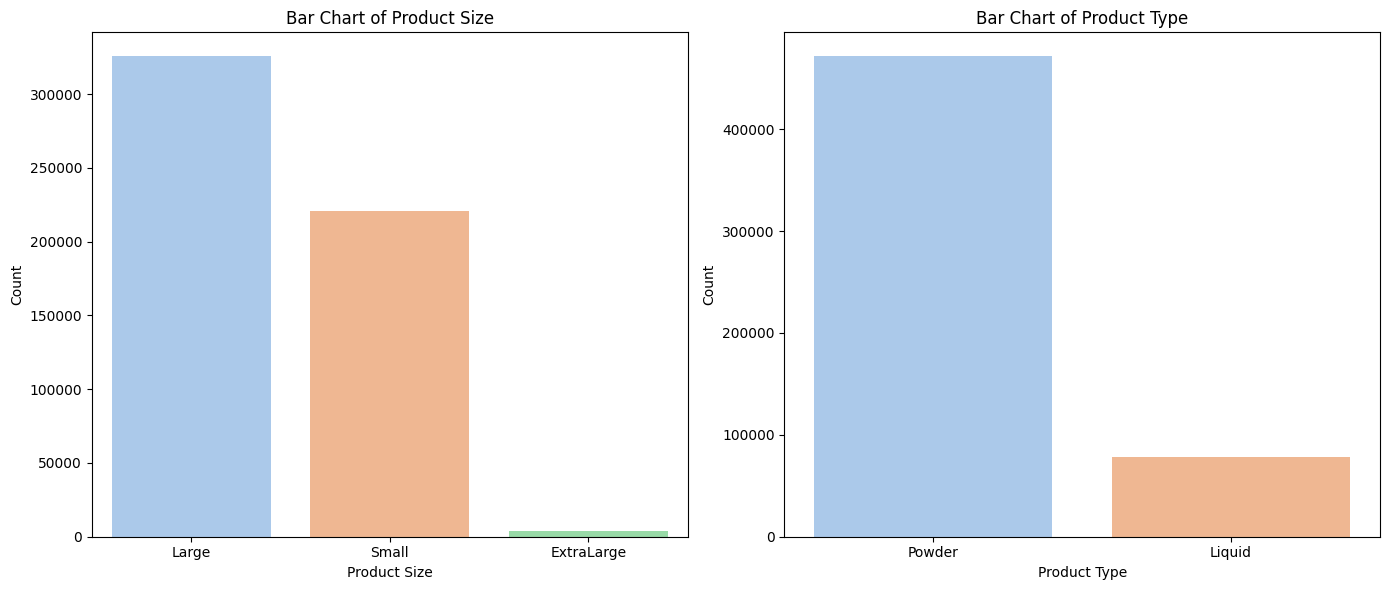

Insights for Product Size:
Product_Size
Large         325566
Small         220462
ExtraLarge      4148
Name: count, dtype: int64

Insights for Product Type:
Product_Type
Powder    471593
Liquid     78583
Name: count, dtype: int64


In [36]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df_train, x='Product_Size', ax=axs[0], palette='pastel')
axs[0].set_title('Bar Chart of Product Size')
axs[0].set_xlabel('Product Size')
axs[0].set_ylabel('Count')

sns.countplot(data=df_train, x='Product_Type', ax=axs[1], palette='pastel')
axs[1].set_title('Bar Chart of Product Type')
axs[1].set_xlabel('Product Type')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

insights_product_size = df_train['Product_Size'].value_counts()
print("Insights for Product Size:")
print(insights_product_size)

insights_product_type = df_train['Product_Type'].value_counts()
print("\nInsights for Product Type:")
print(insights_product_type)

1. 'Large' products exhibit the highest sourcing frequency, contrasting sharply with the limited occurrence of 'ExtraLarge' items, suggesting variations in demand or availability across product sizes.
2. 'Powder' products dominate the dataset, outnumbering 'Liquid' counterparts by a considerable margin, hinting at differential market demands or supply chain preferences.
3. The prevalence of 'Large' products may reflect their pivotal role in the supply chain, possibly indicating their significance in meeting customer needs or operational requirements.
4. The substantial count difference between 'Powder' and 'Liquid' products underscores distinct sourcing patterns, potentially influenced by market dynamics or industry demands.

**5) Top 10 Area Codes by Sourcing Cost**

In [37]:
area_code_sourcing_cost = df_train.groupby('Area_Code')['Sourcing_Cost'].sum().reset_index()

top_10_area_codes = area_code_sourcing_cost.nlargest(10, 'Sourcing_Cost')

fig = go.Figure(go.Bar(
    y=top_10_area_codes['Area_Code'],
    x=top_10_area_codes['Sourcing_Cost'],
    orientation='h',
))

fig.update_layout(
    title='Top 10 Area Codes by Sourcing Cost',
    xaxis_title='Total Sourcing Cost (Rupees)',
    yaxis_title='Area Code',
)
fig.show()

print("Insights:")
print(top_10_area_codes)

Insights:
   Area_Code  Sourcing_Cost
42        A7     5338976.19
21        A3     4735494.81
2        A11     4402444.01
19       A28     4145891.60
43        A8     3972852.90
40        A5     3492157.50
1        A10     3367039.76
11        A2     2180222.45
36       A43     2153659.93
17       A25     2025227.35


1. Area code "A7" incurs the highest sourcing cost, totaling 5,338,976.19 Rupees, indicating significant expenditure in that region.
2. "A3" and "A11" follow closely, suggesting these areas also contribute substantially to the overall sourcing expenses, with costs of 4,735,494.81 and 4,402,444.01 Rupees respectively.
3. The top 10 area codes represent key regions with considerable sourcing activity, signifying potential focal points for supply chain optimization or cost management strategies.
4. While "A2" and "A43" have lower sourcing costs compared to the top-ranking areas, their inclusion in the top 10 underscores their relevance in the sourcing network, warranting attention for further analysis or improvement initiatives.

**6) Maximum Product Size by Area Code**

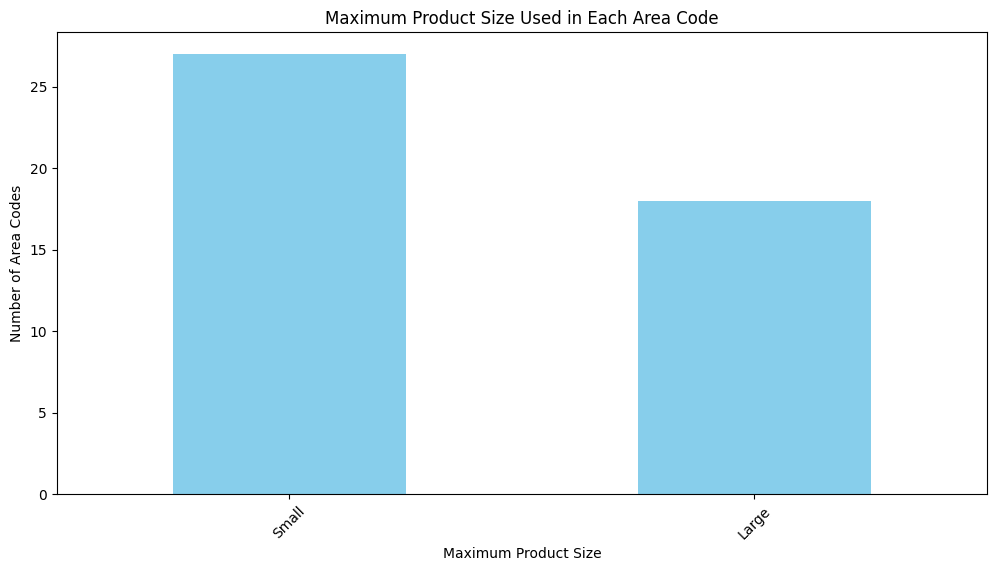

Insights:
Product_Size
Small    27
Large    18
Name: count, dtype: int64


In [38]:
max_product_size_by_area = df_train.groupby('Area_Code')['Product_Size'].max()

plt.figure(figsize=(12, 6))
max_product_size_by_area.value_counts().plot(kind='bar', color='skyblue')
plt.title('Maximum Product Size Used in Each Area Code')
plt.xlabel('Maximum Product Size')
plt.ylabel('Number of Area Codes')
plt.xticks(rotation=45)
plt.show()

print("Insights:")
print(max_product_size_by_area.value_counts())


1. Small product sizes are utilized as the maximum in 27 area codes, indicating their prevalence across various regions in the supply chain network.
2. Large product sizes serve as the maximum in 18 area codes, suggesting their significance in specific geographic areas or segments of the distribution network.

# **Machine Learning Algorithms**

I'll apply Multiple Linear Regression, Polynomial Linear Regression, XGBoost, Decision Tree, Random Forest, and KNN Regressor on the dataset, then evaluate their performance to select the best model based on various scores.


In [39]:
df_train_filtered = df_combined_no_outliers[(df_combined_no_outliers['Month'] >= 1) & (df_combined_no_outliers['Month'] <= 12) & (df_combined_no_outliers['Month'] != 6)]
df_test_filtered = df_combined_no_outliers[df_combined_no_outliers['Month'] == 6]

Filtering the training dataset (df_train_filtered) to exclude outliers and include only months from January to December, except June. Similarly, filtering the test dataset (df_test_filtered) to include only records from June.

**Spliting the training data**

In [40]:
X_train = df_train_filtered.drop(columns=['Sourcing Cost'])
y_train = df_train_filtered['Sourcing Cost']

**Spliting the testing data**

In [41]:
# Extract X (independent variables) and y (dependent variable) for testing
X_test = df_test_filtered.drop(columns=['Sourcing Cost'])
y_test = df_test_filtered['Sourcing Cost']

**1)Multiple Linear Regression**

Multiple Linear Regression is a statistical technique used to model the relationship between multiple independent variables and a continuous dependent variable. It assumes a linear relationship between the predictors and the target variable, aiming to find the best-fitting line that minimizes the difference between observed and predicted values. This method allows for the prediction of the dependent variable based on the values of the independent variables.

In [42]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [43]:
df_results = pd.DataFrame({'Target Sourcing Cost': y_test, 'Predicted Sourcing Cost': y_pred})

print(df_results)

        Target Sourcing Cost  Predicted Sourcing Cost
550176                103.68               129.199177
550177                155.75               133.281250
550178                143.02               141.533482
550179                139.39               133.851446
550180                169.42               138.983207
...                      ...                      ...
550267                 89.57                78.519686
550268                114.57               104.744821
550269                111.26               101.232943
550270                 32.32                29.847591
550271                 40.73                -9.728714

[96 rows x 2 columns]


In [44]:
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print("Multiple Linear Regression Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error (MAE):", mae)

Multiple Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 2167.2885643213117
Root Mean Squared Error (RMSE): 46.554146585683554
R-squared (R2) Score: 0.20113452116665353
Mean Absolute Error (MAE): 36.687342280653375


1. Mean Squared Error (MSE): The average squared difference between the predicted and actual values is approximately 2167.29. This indicates the average magnitude of errors in the predictions.

2. Root Mean Squared Error (RMSE): The square root of the MSE is around 46.55. It represents the standard deviation of the prediction errors and indicates the average error magnitude.

3. R-squared (R2) Score: The coefficient of determination is about 0.201. It signifies the proportion of the variance in the dependent variable that is predictable from the independent variables. Here, the model explains around 20.1% of the variance in the target variable.

4. Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values is approximately 36.69. It provides a measure of the average magnitude of errors in the predictions, irrespective of their direction.

**2) Polynomial Linear Regression**


Polynomial Linear Regression is an extension of the linear regression model that allows for capturing nonlinear relationships between the independent and dependent variables by introducing polynomial terms. It fits a polynomial function to the data points by adding powers of the independent variables, enabling the model to better capture complex patterns and fluctuations in the data. This approach provides flexibility in modeling and can improve predictive performance when the relationship between variables is not strictly linear.

In [45]:
degree = 2

poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

In [46]:
df_results_poly = pd.DataFrame({'Target Sourcing Cost': y_test, 'Predicted Sourcing Cost': y_pred_poly})

print(df_results_poly)

        Target Sourcing Cost  Predicted Sourcing Cost
550176                103.68               115.253633
550177                155.75               136.282340
550178                143.02               168.374878
550179                139.39               135.625492
550180                169.42               131.789396
...                      ...                      ...
550267                 89.57                64.787045
550268                114.57                78.514666
550269                111.26                81.611590
550270                 32.32               -39.003604
550271                 40.73                48.835403

[96 rows x 2 columns]


In [47]:
mse_poly = mean_squared_error(y_test, y_pred_poly)

rmse_poly = np.sqrt(mse_poly)

mae_poly = mean_absolute_error(y_test, y_pred_poly)

r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_poly)
print("Root Mean Squared Error (RMSE):", rmse_poly)
print("Mean Absolute Error (MAE):", mae_poly)
print("R-squared (R2) Score:", r2_poly)

Polynomial Regression Evaluation Metrics:
Mean Squared Error (MSE): 1856.7841578417674
Root Mean Squared Error (RMSE): 43.090418399474466
Mean Absolute Error (MAE): 32.19990405414211
R-squared (R2) Score: 0.31558686288323645


1. Mean Squared Error (MSE): The MSE is approximately 1856.78. It indicates the average squared difference between the predicted and actual values, with lower values suggesting better model performance in terms of accuracy.

2. Root Mean Squared Error (RMSE): The RMSE is around 43.09. It represents the standard deviation of the prediction errors and indicates the average error magnitude, with lower values indicating better model performance.

3. Mean Absolute Error (MAE): The MAE is approximately 32.20. It measures the average absolute difference between the predicted and actual values, providing a robust measure of model performance.

4. R-squared (R2) Score: The R-squared score is about 0.316. It represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. Here, the model explains around 31.6% of the variance in the target variable.

**3) XGBoost**

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm known for its speed and performance in classification and regression tasks. It sequentially builds a series of decision trees to correct errors made by preceding models, employing gradient boosting techniques to optimize model prediction accuracy. XGBoost is highly customizable, allowing for fine-tuning of parameters to enhance model performance and reduce overfitting.

In [48]:
gbm_model = xgb.XGBRegressor()

gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)

In [49]:
df_results_gbm = pd.DataFrame({'Target Sourcing Cost': y_test, 'Predicted Sourcing Cost (GBM)': y_pred_gbm})

print(df_results_gbm)

        Target Sourcing Cost  Predicted Sourcing Cost (GBM)
550176                103.68                     113.333618
550177                155.75                     153.824799
550178                143.02                     152.025711
550179                139.39                     144.472763
550180                169.42                     169.366791
...                      ...                            ...
550267                 89.57                      65.739052
550268                114.57                     122.413979
550269                111.26                     102.536827
550270                 32.32                      11.232555
550271                 40.73                      50.303112

[96 rows x 2 columns]


In [50]:
mse_gbm = mean_squared_error(y_test, y_pred_gbm)

rmse_gbm = np.sqrt(mse_gbm)

mae_gbm = mean_absolute_error(y_test, y_pred_gbm)

r2_gbm = r2_score(y_test, y_pred_gbm)

print("Xtreme Gradient Boost Evaluation Metrics:")
print("Mean Squared Error (GBM):", mse_gbm)
print("Root Mean Squared Error (GBM):", rmse_gbm)
print("Mean Absolute Error (GBM):", mae_gbm)
print("R-squared (R2) Score (GBM):", r2_gbm)


Xtreme Gradient Boost Evaluation Metrics:
Mean Squared Error (GBM): 950.8858807625235
Root Mean Squared Error (GBM): 30.836437549796887
Mean Absolute Error (GBM): 15.93164641181628
R-squared (R2) Score (GBM): 0.649502185838783


1. Mean Squared Error (MSE): The MSE is approximately 950.89. It indicates the average squared difference between the predicted and actual values, with lower values suggesting better model accuracy.

2. Root Mean Squared Error (RMSE): The RMSE is around 30.84. It represents the standard deviation of the prediction errors and indicates the average error magnitude, with lower values indicating better model performance.

3. Mean Absolute Error (MAE): The MAE is approximately 15.93. It measures the average absolute difference between the predicted and actual values, providing a robust measure of model accuracy.

4. R-squared (R2) Score: The R-squared score is about 0.650. It represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. Here, the XGBoost model explains around 65.0% of the variance in the target variable.

**4) Decision Tree**

A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It partitions the dataset into subsets based on features that best split the data, recursively building a tree-like structure. At each node, the algorithm selects the feature that maximizes the information gain or minimizes impurity, such as Gini impurity or entropy. This process continues until a stopping criterion is met, such as reaching a maximum depth or minimum number of samples per leaf. Decision Trees are intuitive, easy to interpret, and can handle both numerical and categorical data. However, they are prone to overfitting and may not generalize well to unseen data compared to ensemble methods like Random Forests or Gradient Boosting.

In [51]:
dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

In [52]:
df_results_dt = pd.DataFrame({'Target Sourcing Cost': y_test, 'Predicted Sourcing Cost (Decision Tree)': y_pred_dt})

print(df_results_dt)

        Target Sourcing Cost  Predicted Sourcing Cost (Decision Tree)
550176                103.68                               113.516164
550177                155.75                               154.202538
550178                143.02                               149.619884
550179                139.39                               144.105425
550180                169.42                               171.041649
...                      ...                                      ...
550267                 89.57                                66.303589
550268                114.57                               120.910636
550269                111.26                               100.967861
550270                 32.32                                 8.010102
550271                 40.73                                50.464128

[96 rows x 2 columns]


In [53]:
mse_dt = mean_squared_error(y_test, y_pred_dt)

rmse_dt = np.sqrt(mse_dt)

mae_dt = mean_absolute_error(y_test, y_pred_dt)

r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Evaluation Metrics:")
print("Mean Squared Error (Decision Tree):", mse_dt)
print("Root Mean Squared Error (Decision Tree):", rmse_dt)
print("Mean Absolute Error (Decision Tree):", mae_dt)
print("R-squared (R2) Score (Decision Tree):", r2_dt)

Decision Tree Evaluation Metrics:
Mean Squared Error (Decision Tree): 1066.1590753633338
Root Mean Squared Error (Decision Tree): 32.6520914393448
Mean Absolute Error (Decision Tree): 16.555190555603684
R-squared (R2) Score (Decision Tree): 0.6070123313185276


1. Mean Squared Error (MSE): The MSE is approximately 1066.16. It indicates the average squared difference between the predicted and actual values, with lower values suggesting better model accuracy.

2. Root Mean Squared Error (RMSE): The RMSE is around 32.65. It represents the standard deviation of the prediction errors and indicates the average error magnitude, with lower values indicating better model performance.

3. Mean Absolute Error (MAE): The MAE is approximately 16.56. It measures the average absolute difference between the predicted and actual values, providing a robust measure of model accuracy.

4. R-squared (R2) Score: The R-squared score is about 0.607. It represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. Here, the Decision Tree model explains around 60.7% of the variance in the target variable.

**5) Random Forest**

Random Forest is an ensemble learning technique based on Decision Trees. It builds multiple decision trees during training and combines their predictions through averaging or voting to improve accuracy and reduce overfitting. Each tree in the forest is trained on a random subset of the training data and a random subset of features. This randomness introduces diversity among the trees, making the model more robust and less prone to overfitting. During prediction, the ensemble of trees aggregates the individual predictions to make a final prediction, resulting in a more accurate and stable model compared to a single Decision Tree. Random Forest is versatile, scalable, and effective for both classification and regression tasks, often outperforming individual Decision Trees.

In [54]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [55]:
df_results_rf = pd.DataFrame({'Target Sourcing Cost': y_test, 'Predicted Sourcing Cost (Random Forest)': y_pred_rf})

print(df_results_rf)

        Target Sourcing Cost  Predicted Sourcing Cost (Random Forest)
550176                103.68                               113.512581
550177                155.75                               154.200805
550178                143.02                               149.620085
550179                139.39                               144.122350
550180                169.42                               171.082817
...                      ...                                      ...
550267                 89.57                                66.298355
550268                114.57                               120.957748
550269                111.26                               100.847569
550270                 32.32                                 7.961098
550271                 40.73                                50.393201

[96 rows x 2 columns]


In [56]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

rmse_rf = np.sqrt(mse_rf)

mae_rf = mean_absolute_error(y_test, y_pred_rf)

r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Evaluation Metrics:")
print("Mean Squared Error (Random Forest):", mse_rf)
print("Root Mean Squared Error (Random Forest):", rmse_rf)
print("Mean Absolute Error (Random Forest):", mae_rf)
print("R-squared (R2) Score (Random Forest):", r2_rf)

Random Forest Evaluation Metrics:
Mean Squared Error (Random Forest): 1068.6453183371484
Root Mean Squared Error (Random Forest): 32.69014099598147
Mean Absolute Error (Random Forest): 16.562489751642772
R-squared (R2) Score (Random Forest): 0.6060958988155054


1. Mean Squared Error (MSE): The MSE is approximately 1068.65. It indicates the average squared difference between the predicted and actual values, with lower values suggesting better model accuracy.

2. Root Mean Squared Error (RMSE): The RMSE is around 32.69. It represents the standard deviation of the prediction errors and indicates the average error magnitude, with lower values indicating better model performance.

3. Mean Absolute Error (MAE): The MAE is approximately 16.56. It measures the average absolute difference between the predicted and actual values, providing a robust measure of model accuracy.

4. R-squared (R2) Score: The R-squared score is about 0.606. It represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. Here, the Random Forest model explains around 60.6% of the variance in the target variable.

**6) KNN Regressor**

KNN (K-Nearest Neighbors) Regressor is a supervised machine learning algorithm used for regression tasks. It predicts the target variable of a data point by averaging the target values of its k nearest neighbors, where "k" is a hyperparameter specified by the user. During training, the algorithm memorizes the entire training dataset, and during prediction, it calculates the distance between the query instance and all training instances to identify the nearest neighbors. KNN Regressor is simple, intuitive, and non-parametric, making it suitable for small to medium-sized datasets with few features. However, it can be computationally expensive during prediction, especially for large datasets, and may not perform well with high-dimensional data or when the feature space is sparse.

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_model = KNeighborsRegressor()

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

In [58]:
df_results_knn = pd.DataFrame({'Target Sourcing Cost': y_test, 'Predicted Sourcing Cost (KNN)': y_pred_knn})

print(df_results_knn)

        Target Sourcing Cost  Predicted Sourcing Cost (KNN)
550176                103.68                        113.874
550177                155.75                        134.864
550178                143.02                        149.760
550179                139.39                        140.968
550180                169.42                        152.902
...                      ...                            ...
550267                 89.57                         66.510
550268                114.57                        118.354
550269                111.26                        131.874
550270                 32.32                          5.518
550271                 40.73                         44.640

[96 rows x 2 columns]


In [59]:
mse_knn = mean_squared_error(y_test, y_pred_knn)

rmse_knn = np.sqrt(mse_knn)

mae_knn = mean_absolute_error(y_test, y_pred_knn)

r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regressor Evaluation Metrics:")
print("Mean Squared Error (KNN):", mse_knn)
print("Root Mean Squared Error (KNN):", rmse_knn)
print("Mean Absolute Error (KNN):", mae_knn)
print("R-squared (R2) Score (KNN):", r2_knn)

KNN Regressor Evaluation Metrics:
Mean Squared Error (KNN): 1275.777125375
Root Mean Squared Error (KNN): 35.71802241691161
Mean Absolute Error (KNN): 18.57710416666667
R-squared (R2) Score (KNN): 0.5297468362426001


1. Mean Squared Error (MSE): The MSE is approximately 1275.78. It indicates the average squared difference between the predicted and actual values, with lower values suggesting better model accuracy.

2. Root Mean Squared Error (RMSE): The RMSE is around 35.72. It represents the standard deviation of the prediction errors and indicates the average error magnitude, with lower values indicating better model performance.

3. Mean Absolute Error (MAE): The MAE is approximately 18.58. It measures the average absolute difference between the predicted and actual values, providing a robust measure of model accuracy.

4. R-squared (R2) Score: The R-squared score is about 0.530. It represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. Here, the KNN Regressor model explains around 53.0% of the variance in the target variable.

In [ ]:
models = [
    "Multiple Linear Regression",
    "Polynomial Regression",
    "Xtreme Gradient Boost (GBM)",
    "Decision Tree",
    "Random Forest",
    "KNN Regressor"
]

mse_values = [mse, mse_poly, mse_gbm, mse_dt, mse_rf, mse_knn]
rmse_values = [rmse, rmse_poly, rmse_gbm, rmse_dt, rmse_rf, rmse_knn]
mae_values = [mae, mae_poly, mae_gbm, mae_dt, mae_rf, mae_knn]
r2_values = [r2, r2_poly, r2_gbm, r2_dt, r2_rf, r2_knn]

print("| {:<30} | {:<8} | {:<8} | {:<8} | {:<8} |".format("Model", "MSE", "RMSE", "MAE", "R2 Score"))
print("|" + "-"*34 + "|" + "-"*10 + "|" + "-"*10 + "|" + "-"*10 + "|" + "-"*10 + "|")

# Print each row of the table
for model, mse, rmse, mae, r2 in zip(models, mse_values, rmse_values, mae_values, r2_values):
    print("| {:<30} | {:.4f}   | {:.4f}   | {:.4f}   | {:.4f}   |".format(model, mse, rmse, mae, r2))

| Model                          | MSE      | RMSE     | MAE      | R2 Score |
|----------------------------------|----------|----------|----------|----------|
| Multiple Linear Regression     | 2167.2886   | 46.5541   | 36.6873   | 0.2011   |
| Polynomial Regression          | 1856.7842   | 43.0904   | 32.1999   | 0.3156   |
| Xtreme Gradient Boost (GBM)    | 950.8859   | 30.8364   | 15.9316   | 0.6495   |
| Decision Tree                  | 1066.1591   | 32.6521   | 16.5552   | 0.6070   |
| Random Forest                  | 1069.3853   | 32.7015   | 16.5688   | 0.6058   |
| KNN Regressor                  | 1275.7771   | 35.7180   | 18.5771   | 0.5297   |


1) XGBoost outperforms all other models with the lowest MSE, RMSE, and MAE, and the highest R2 Score. It demonstrates superior predictive performance and explains a significant portion of the variance in the target variable.

2) Polynomial Regression also performs relatively well compared to other models, with lower errors and a higher R2 Score than linear models.

3) Decision Tree and Random Forest have similar performance metrics, indicating moderate accuracy and explanatory power. Random Forest may have a slight advantage due to its ensemble nature, which reduces overfitting.

4) Multiple Linear Regression and KNN Regressor exhibit higher errors and lower R2 Scores compared to other models, suggesting less accurate predictions and poorer explanatory capabilities.

# **Conclusion**

Therefore XGBoost is the final algorithm choosen because of :
1. High Predictive Accuracy: XGBoost is highly accurate and often outperforms other algorithms in terms of prediction accuracy. It effectively captures complex relationships between features and the target variable, resulting in more precise predictions.

2. Robust to Overfitting: XGBoost includes regularization techniques such as shrinkage (learning rate) and column subsampling, which help prevent overfitting. This makes it more robust and less prone to capturing noise in the data, leading to better generalization performance.

3. Scalability: XGBoost is optimized for parallel computing and can efficiently handle large datasets. It is scalable and can be trained on datasets with millions of samples and features, making it suitable for both small and big data problems.

4. Feature Importance: XGBoost provides valuable insights into feature importance, allowing users to understand which features contribute the most to the model's predictions. This can help in feature selection, model interpretation, and identifying key factors driving the target variable.

5. Wide Adoption and Community Support: XGBoost is widely used in industry and academia, with a large community of users and contributors. This means there is extensive documentation, tutorials, and resources available for learning and troubleshooting XGBoost implementations.